In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv("cement_slump.csv")

In [3]:
df.shape

(103, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [5]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [6]:
df.corr()['Compressive Strength (28-day)(Mpa)'].sort_values()

Slag                                 -0.331522
Water                                -0.254320
SLUMP(cm)                            -0.223499
Coarse Aggr.                         -0.160610
Fine Aggr.                           -0.154532
FLOW(cm)                             -0.124189
SP                                   -0.037909
Fly ash                               0.444380
Cement                                0.445656
Compressive Strength (28-day)(Mpa)    1.000000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

<AxesSubplot:xlabel='Cement', ylabel='Compressive Strength (28-day)(Mpa)'>

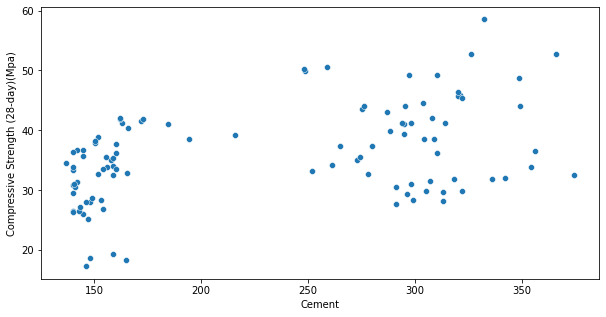

In [7]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = df,x ='Cement' ,y = 'Compressive Strength (28-day)(Mpa)')

<AxesSubplot:xlabel='SLUMP(cm)', ylabel='FLOW(cm)'>

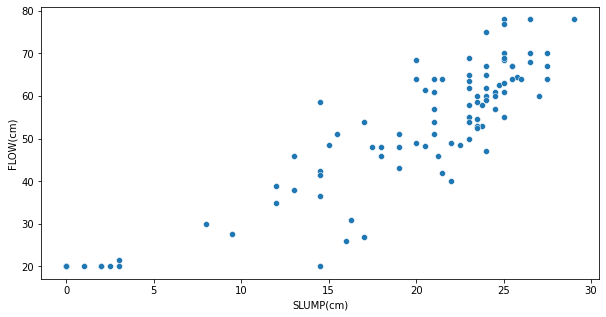

In [8]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = df,x ='SLUMP(cm)' ,y = 'FLOW(cm)')

<AxesSubplot:>

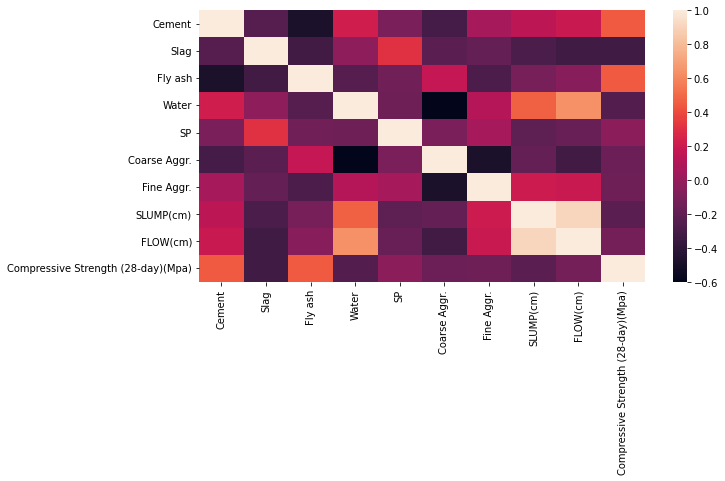

In [9]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr())

In [10]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis =1)

In [11]:
y = df['Compressive Strength (28-day)(Mpa)']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [13]:
scaler = StandardScaler()

In [14]:
model = SVR()

In [15]:
operations = [('scaler', scaler), ('model', model)]

In [16]:
pipe = Pipeline(operations)

In [17]:
param = {'model__C': [0.001,0.01,0.1,0.5,1],
         'model__gamma': ['scale', 'auto'],
         'model__kernel':['linear', 'poly', 'rbf', 'sigmoid'],
         'model__degree': [2,3,4],
         'model__epsilon': [0.001, 0.01, 0.1, 1.0, 2]}

In [18]:
grid = GridSearchCV(pipe, param_grid = param)

In [19]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             param_grid={'model__C': [0.001, 0.01, 0.1, 0.5, 1],
                         'model__degree': [2, 3, 4],
                         'model__epsilon': [0.001, 0.01, 0.1, 1.0, 2],
                         'model__gamma': ['scale', 'auto'],
                         'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [20]:
grid.best_params_

{'model__C': 1,
 'model__degree': 2,
 'model__epsilon': 2,
 'model__gamma': 'scale',
 'model__kernel': 'linear'}

In [21]:
scores  = grid.cv_results_['mean_test_score']

In [22]:
grid.best_score_

0.8410237694106868

In [23]:
grid_pred = grid.predict(X_test)

In [24]:
r2_score(y_test,grid_pred)

0.9593040793268685

In [25]:
mean_absolute_error(y_test,grid_pred)

1.4747685625780627

In [26]:
svr_model = SVR(C = 1,degree = 2, epsilon= 2, gamma = 'scale', kernel =  'linear')

In [27]:
operation = [('scaler', scaler), ('svr_model', svr_model)]

In [28]:
pipe = Pipeline(operation)

In [29]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svr_model', SVR(C=1, degree=2, epsilon=2, kernel='linear'))])

In [30]:
svr_pred = pipe.predict(X_test)

In [31]:
r2_score(y_test, svr_pred)

0.9593040793268685

In [35]:
coeffs = svr_model.coef_
coeffs = coeffs.reshape(-1)

In [36]:
coeffs = pd.DataFrame(coeffs)
coeffs.index = X.columns
coeffs = coeffs.sort_values(by = 0)

In [37]:
coeffs

,0
Coarse Aggr.,-3.068284
Water,-2.874175
Fine Aggr.,-1.659175
SLUMP(cm),-1.568197
Slag,-1.201735
SP,0.299998
FLOW(cm),0.604673
Fly ash,4.656971
Cement,4.866322


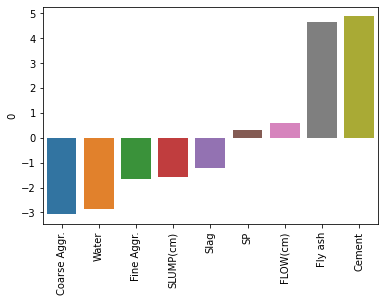

In [38]:
sns.barplot(data = coeffs, x = coeffs.index, y = coeffs[0])
plt.xticks(rotation = 90);

In [42]:
prediction =[X_test.iloc[10]]

In [43]:
pipe.predict(prediction)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([38.17978347])

In [ ]:
coeffs